In [78]:
#Вчитување на потребните библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt,find_peaks
from sklearn.preprocessing import MinMaxScaler
from numpy.fft import fft, fftfreq
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
import xgboost as xgb
import seaborn as sns

In [2]:
#Вчитување на податочното множество
data=pd.read_csv('mitbih_test.csv',header=None)

In [3]:
print(data.head())

        0         1         2         3         4         5         6    \
0  1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1  0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2  0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3  1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4  0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.080537  0.070470  0.090604  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0 

In [4]:
#Формирање на имиња на колони 
data.columns = [f'feature_{i}' for i in range(data.shape[1] - 1)] + ['class']

In [5]:
print(data)

       feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0       1.000000   0.758264   0.111570   0.000000   0.080579   0.078512   
1       0.908425   0.783883   0.531136   0.362637   0.366300   0.344322   
2       0.730088   0.212389   0.000000   0.119469   0.101770   0.101770   
3       1.000000   0.910417   0.681250   0.472917   0.229167   0.068750   
4       0.570470   0.399329   0.238255   0.147651   0.000000   0.003356   
...          ...        ...        ...        ...        ...        ...   
21887   0.928736   0.871264   0.804598   0.742529   0.650575   0.535632   
21888   0.802691   0.692078   0.587444   0.446936   0.318386   0.189836   
21889   1.000000   0.967359   0.620178   0.347181   0.139466   0.089021   
21890   0.984127   0.567460   0.607143   0.583333   0.607143   0.575397   
21891   0.973970   0.913232   0.865510   0.823210   0.746204   0.642082   

       feature_6  feature_7  feature_8  feature_9  ...  feature_178  \
0       0.066116   0.049587 

In [6]:
#Основни информации за data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, feature_0 to class
dtypes: float64(188)
memory usage: 31.4 MB
None


In [7]:
#Проверуваме дали има null вредности
data.isnull().sum()

feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
              ..
feature_183    0
feature_184    0
feature_185    0
feature_186    0
class          0
Length: 188, dtype: int64

In [8]:
data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,class
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [9]:
#Отстранување на null вредностите
data=data.dropna()

In [10]:
data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,class
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [35]:
#Нормализација на податоци
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.iloc[:, :-1]) 

In [12]:

sample_signal = scaled_data[0]

In [13]:
#Филтрирање на шум, со low-pas filter
def low_pass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [14]:
cutoff=5.0
fs=125.0

In [15]:
filtered_data = low_pass_filter(sample_signal, cutoff, fs)

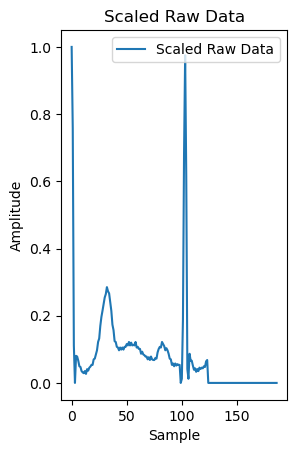

In [16]:
plt.subplot(1, 2, 1)
plt.plot(sample_signal, label='Scaled Raw Data')
plt.title('Scaled Raw Data')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

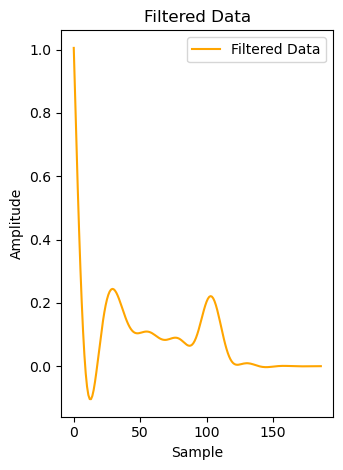

In [17]:
plt.subplot(1, 2, 2)
plt.plot(filtered_data, label='Filtered Data', color='orange')
plt.title('Filtered Data')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [20]:
signal = data.iloc[0, :-1].values

In [21]:
#Детекција на пикови
peaks, _ = find_peaks(signal, distance=50)  

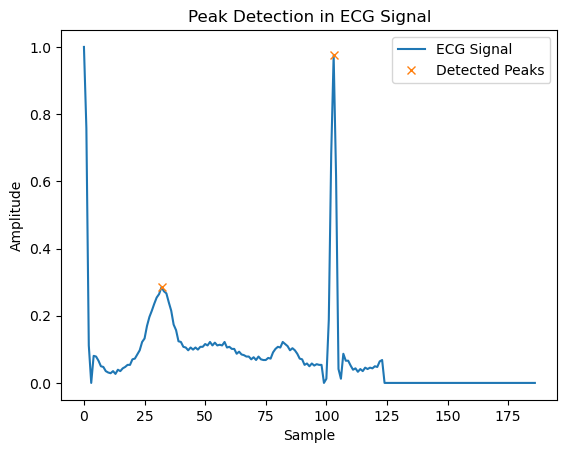

In [22]:
plt.plot(signal, label='ECG Signal')
plt.plot(peaks, signal[peaks], "x", label='Detected Peaks')
plt.title('Peak Detection in ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [25]:
#Анализа на фрекфенција
signal = data.iloc[0, :-1].values 

In [27]:
N = len(signal)
T = 1.0 / 125 
yf = fft(signal)
xf = fftfreq(N, T)[:N//2]

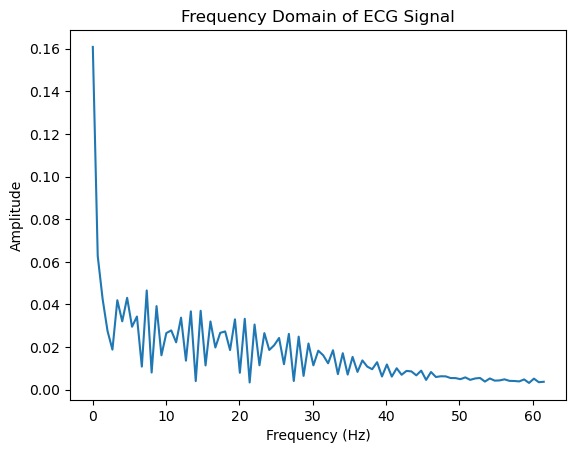

In [28]:
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title('Frequency Domain of ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [36]:
#PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [37]:
pca_data = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

In [38]:
pca_data

,PC1,PC2
0,-1.418444,0.348774
1,0.577514,-1.196094
2,-0.871635,0.244569
3,-0.192687,-0.247285
4,0.686642,0.189691
...,...,...
21887,2.781722,-0.097566
21888,3.917807,-0.299866
21889,-1.214506,0.775158
21890,0.268280,0.511152


In [76]:
pca_data['class'] = data['class']

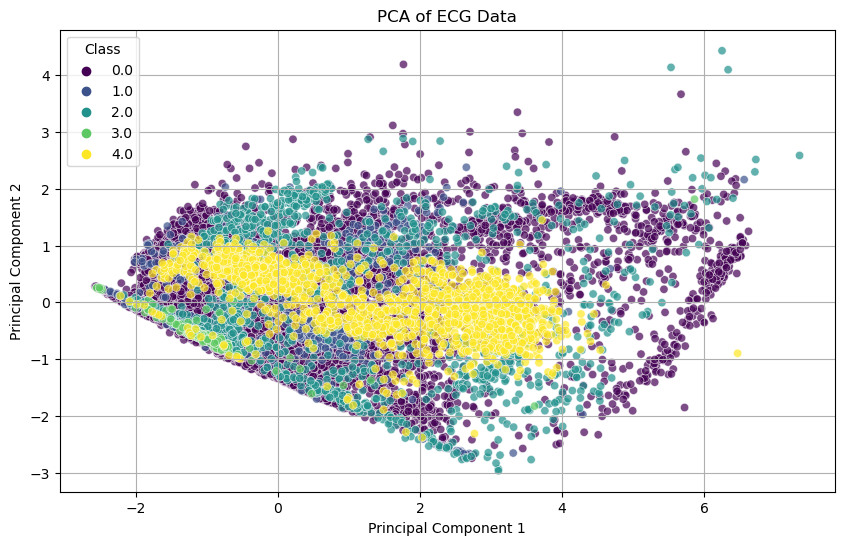

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_data, x='PC1', y='PC2', hue='class', palette='viridis', alpha=0.7)
plt.title('PCA of ECG Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.grid(True)
plt.show()

In [40]:
#Поделба на податочното множество на train i test
X_train, X_test, y_train, y_test = train_test_split(principal_components, data['class'], test_size=0.3, random_state=42)

In [42]:
#Random Forest Classifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred = model.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      5466
         1.0       0.31      0.07      0.12       165
         2.0       0.46      0.27      0.34       417
         3.0       0.10      0.02      0.03        52
         4.0       0.58      0.42      0.49       468

    accuracy                           0.85      6568
   macro avg       0.47      0.35      0.38      6568
weighted avg       0.81      0.85      0.82      6568



In [54]:
#Support Vector Machine
svm_model = svm.SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

In [55]:
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [40]:
y_pred = svm_model.predict(X_test)
print(" Classification Report:\n", classification_report(y_test, y_pred))

 Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      5466
         1.0       0.00      0.00      0.00       165
         2.0       0.60      0.12      0.21       417
         3.0       0.00      0.00      0.00        52
         4.0       0.80      0.34      0.47       468

    accuracy                           0.86      6568
   macro avg       0.45      0.29      0.32      6568
weighted avg       0.81      0.86      0.82      6568



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
#XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)

In [69]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [70]:
y_pred = xgb_model.predict(X_test)

In [71]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.855816077953715
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      5466
         1.0       0.28      0.04      0.07       165
         2.0       0.52      0.24      0.33       417
         3.0       0.00      0.00      0.00        52
         4.0       0.66      0.43      0.52       468

    accuracy                           0.86      6568
   macro avg       0.47      0.34      0.37      6568
weighted avg       0.82      0.86      0.83      6568

